<a href="https://colab.research.google.com/github/min02yam/Data-study/blob/main/%EC%97%B0%EC%8A%B5_svm_%2C%2C%2C%2C%2C%2Cipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
install.packages("e1071");  library(e1071)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




In [28]:
install.packages(c("kernlab","caret")) ; library(kernlab); library(caret)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘Rcpp’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:kernlab’:

    alpha


Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [1]:
df<-read.csv("/content/credit_final.csv")

In [5]:
str(df)

'data.frame':	1000 obs. of  21 variables:
 $ credit.rating                 : int  1 1 1 1 1 1 1 1 1 1 ...
 $ account.balance               : int  1 1 2 1 1 1 1 1 3 2 ...
 $ credit.duration.months        : int  18 9 12 12 12 10 8 6 18 24 ...
 $ previous.credit.payment.status: int  3 3 2 3 3 3 3 3 3 2 ...
 $ credit.purpose                : int  2 4 4 4 4 4 4 4 3 3 ...
 $ credit.amount                 : int  1049 2799 841 2122 2171 2241 3398 1361 1098 3758 ...
 $ savings                       : int  1 1 2 1 1 1 1 1 1 3 ...
 $ employment.duration           : int  1 2 3 2 2 1 3 1 1 1 ...
 $ installment.rate              : int  4 2 2 3 4 1 1 2 4 1 ...
 $ marital.status                : int  1 3 1 3 3 3 3 3 1 1 ...
 $ guarantor                     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ residence.duration            : int  4 2 4 2 4 3 4 4 4 4 ...
 $ current.assets                : int  2 1 1 1 2 1 1 1 3 4 ...
 $ age                           : int  21 36 23 39 38 48 39 40 65 23 ...
 $ other.credits

In [2]:
set.seed(2022)

In [4]:
idx<-sample(1:nrow(df), nrow(df)*0.7, replace=FALSE)
train<-df[idx,]
test<-df[-idx,]

In [38]:
tune1<-tune.svm(credit.rating~. , data=train ,gamma=10^(-5:-1) , cost=10^(1:2)) 

In [39]:
 summary(tune1) #디폴트 가우시안 


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
  0.01   10

- best performance: 0.1752139 

- Detailed performance results:
   gamma cost     error dispersion
1  1e-05   10 0.2622767 0.04876121
2  1e-04   10 0.2414600 0.04550337
3  1e-03   10 0.2173651 0.04343214
4  1e-02   10 0.1752139 0.03135293
5  1e-01   10 0.1940782 0.04830641
6  1e-05  100 0.2414921 0.04550188
7  1e-04  100 0.2249929 0.04501968
8  1e-03  100 0.1790516 0.03291931
9  1e-02  100 0.2227792 0.04391526
10 1e-01  100 0.2010684 0.05250274


In [37]:
tune.svm(credit.rating~. , data=train ,kernel="linear",gamma=10^(-5:-1) , cost=10^(1:2))


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
 1e-05   10

- best performance: 0.221376 


In [26]:
#tune.svm(credit.rating~. , data=train , ranges=list(gamma=10^(-5:-1)) , cost=10^(1:2))

ERROR: ignored

In [41]:
#교차검증,,, 멍멍 멍멍멍 멍멍멍멍
cntl<-rfeControl(lrFuncs, method="cv", number=10)

In [52]:
svm_ft<-rfe(train[,-1], train[,1], sizes=2^(2:4), rfeContol=rfeControl(lrFuncs, method="cv", number=10))

ERROR: ignored

In [46]:
?rfe

In [ ]:
cntl


In [89]:
cost<-c(1, seq(5,40,5))

acc<-sapply(cost, function(x){ 
  set.seed(2022)
fit<-ksvm(train[,1]~., train, kernel="rbfdot", C=x)    # 리니어 왜 안됨  ~ 
  pred<-predict(fit, test)
  agr<-ifelse(pred==test[,1], 1, 0)
  acc<-sum(agr)/nrow(test)
  
  return(acc)
})

In [88]:
#train[,1]<-as.factor(train[,1])
#test[,1]<-as.factor(test[,1])
#str(test)
str(train)

'data.frame':	700 obs. of  21 variables:
 $ credit.rating                 : Factor w/ 2 levels "0","1": 1 2 1 1 1 1 2 2 2 2 ...
 $ account.balance               : int  3 3 1 2 1 1 2 3 3 3 ...
 $ credit.duration.months        : int  30 6 24 18 24 36 24 30 24 21 ...
 $ previous.credit.payment.status: int  3 2 2 2 1 1 2 3 3 3 ...
 $ credit.purpose                : int  4 2 3 4 2 2 3 3 2 2 ...
 $ credit.amount                 : int  1908 1543 1987 1042 6872 2746 5084 3077 2028 1591 ...
 $ savings                       : int  1 3 1 4 1 1 4 4 1 2 ...
 $ employment.duration           : int  4 2 2 2 1 4 4 4 3 3 ...
 $ installment.rate              : int  4 4 2 4 2 4 2 3 2 4 ...
 $ marital.status                : int  3 1 3 1 1 3 1 3 3 3 ...
 $ guarantor                     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ residence.duration            : int  4 2 4 2 1 4 4 2 2 3 ...
 $ current.assets                : int  1 1 1 2 2 3 3 3 2 1 ...
 $ age                           : int  66 33 21 33 55 31 42 40 3

In [97]:
#fit<-ksvm(train[,1]~., train, kernel="rbfdot", C=10) ; fit
#pred<-predict(fit, test, type="response") ; pred
#agr<-ifelse(pred==test[,1], 1, 0); agr

[1] 1 1 1 1 1 0
Levels: 0 1

In [57]:
install.packages("ROCR") 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’




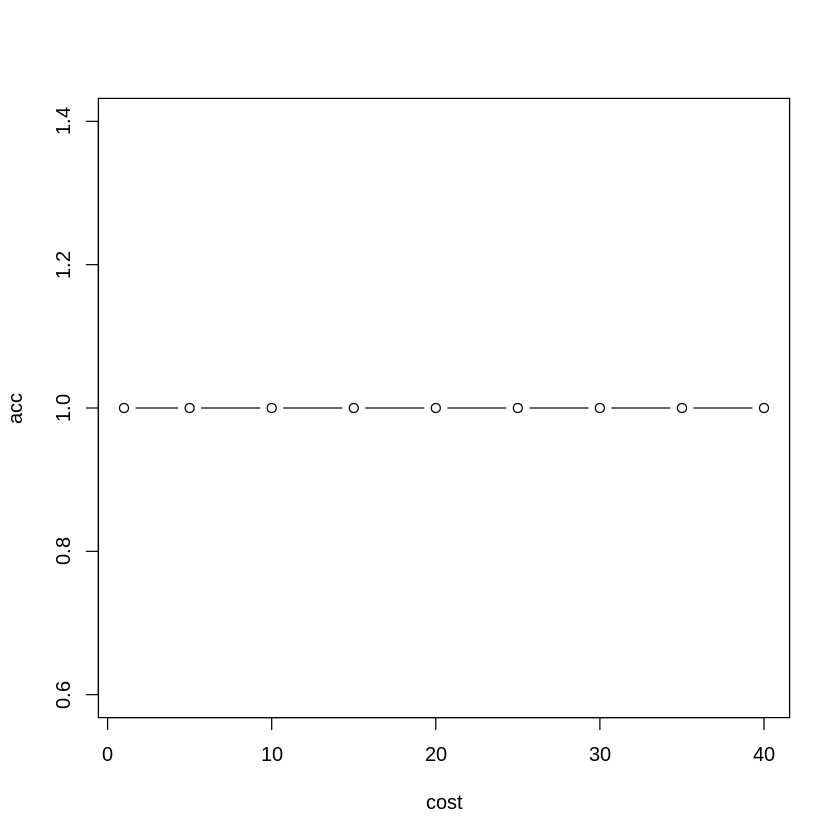

In [90]:
library(ROCR)
plot(cost, acc, type="b") # 가능한가, ? ,, ? ,,,  ;; 

In [75]:
?predict